In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [42]:
columnas = [
    'checking_account',
    'duration',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account',
    'employment',
    'installment_rate',
    'personal_status',
    'other_debtors',
    'residence_since',
    'property',
    'age',
    'other_installment',
    'housing',
    'existing_credits',
    'job',
    'people_liable',
    'telephone',
    'foreign_worker',
    'target'
]

In [43]:
df = pd.read_csv('statlog+german+credit+data/german.data', 
                 sep=' ', 
                 names=columnas,
                 header=None)
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment,housing,existing_credits,job,people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [44]:
checking_account_map = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM / salary assignments',
    'A14': 'no checking account'
}

credit_history_map = {
    'A30': 'no credits taken/all paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing'
}

purpose_map = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

savings_account_map = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}

employment_map = {
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}

personal_status_map = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}

other_debtors_map = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}

property_map = {
    'A121': 'real estate',
    'A122': 'building society savings agreement/life insurance',
    'A123': 'car or other',
    'A124': 'unknown/no property'
}

other_installment_map = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}

housing_map = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}

job_map = {
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified'
}

telephone_map = {
    'A191': 'none',
    'A192': 'yes, registered under customer name'
}

foreign_worker_map = {
    'A201': 'yes',
    'A202': 'no'
}

In [45]:
df['checking_account'] = df['checking_account'].map(checking_account_map)
df['credit_history'] = df['credit_history'].map(credit_history_map)
df['purpose'] = df['purpose'].map(purpose_map)
df['savings_account'] = df['savings_account'].map(savings_account_map)
df['employment'] = df['employment'].map(employment_map)
df['personal_status'] = df['personal_status'].map(personal_status_map)
df['other_debtors'] = df['other_debtors'].map(other_debtors_map)
df['property'] = df['property'].map(property_map)
df['other_installment'] = df['other_installment'].map(other_installment_map)
df['housing'] = df['housing'].map(housing_map)
df['job'] = df['job'].map(job_map)
df['telephone'] = df['telephone'].map(telephone_map)
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)

df['target'] = df['target'].map({1: 'good', 2: 'bad'})

In [46]:
df['personal_status'] = df['personal_status'].apply(lambda x: 'female' if 'female' in x else 'male')

In [47]:
X = df.drop('target', axis=1)
y = df['target']

## Análisis Exploratorio

In [48]:
print("\nInformación del Dataset:")
print(f"Número de muestras: {len(df)}")
print(f"Número de características: {len(X.columns)}")
print("\nTipos de características:")
print(X.dtypes)
print("\nDistribución del objetivo:")
print(y.value_counts())


Información del Dataset:
Número de muestras: 1000
Número de características: 20

Tipos de características:
checking_account     object
duration              int64
credit_history       object
purpose              object
credit_amount         int64
savings_account      object
employment           object
installment_rate      int64
personal_status      object
other_debtors        object
residence_since       int64
property             object
age                   int64
other_installment    object
housing              object
existing_credits      int64
job                  object
people_liable         int64
telephone            object
foreign_worker       object
dtype: object

Distribución del objetivo:
target
good    700
bad     300
Name: count, dtype: int64


Text(0.5, 1.0, 'Personas Responsables')

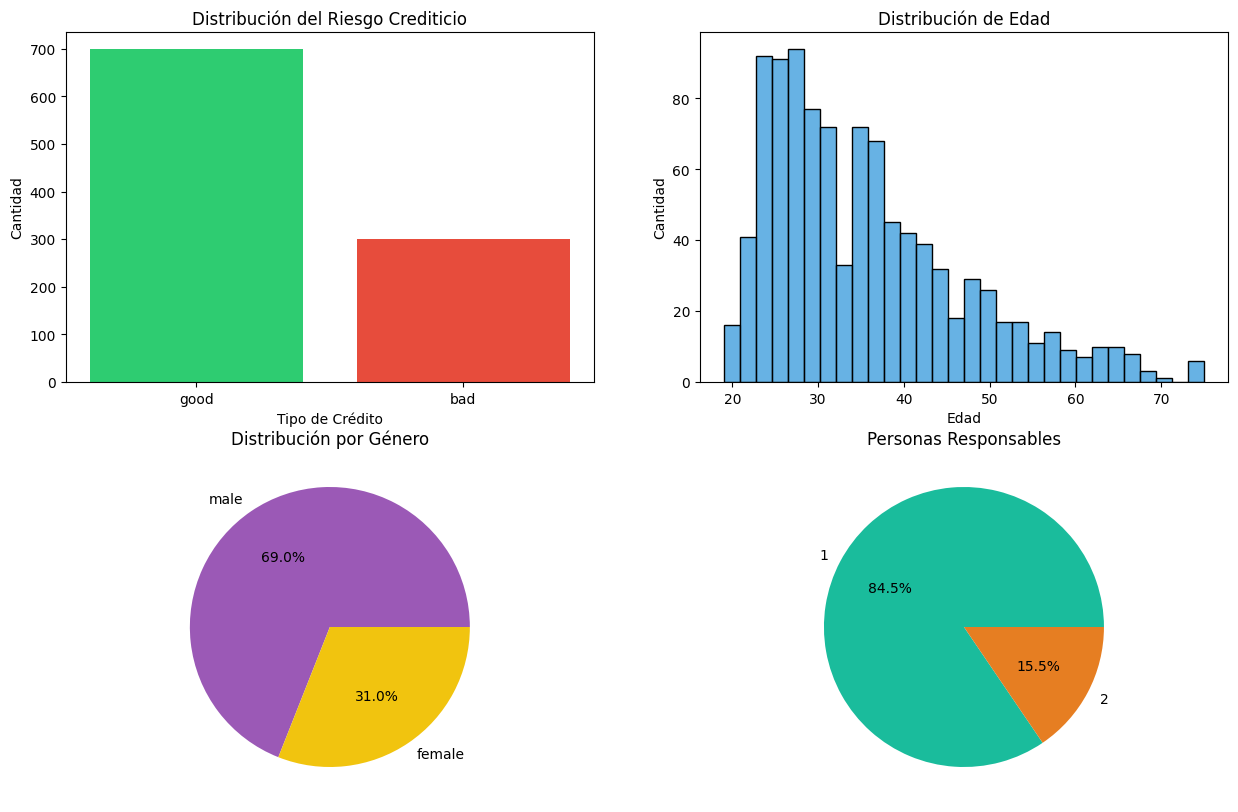

In [49]:
plt.figure(figsize=(15, 10))

# 1. Distribución del Riesgo Crediticio
plt.subplot(2, 2, 1)
target_counts = y.value_counts()
plt.bar(target_counts.index, target_counts.values, color=['#2ecc71', '#e74c3c'])
plt.title('Distribución del Riesgo Crediticio')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Cantidad')

# 2. Distribución de Edad
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='age', bins=30, color='#3498db')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# 3. Distribución por Género
plt.subplot(2, 2, 3)
gender_counts = df['personal_status'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['#9b59b6', '#f1c40f'])
plt.title('Distribución por Género')

# 4. Distribucion de Personas Responsables
plt.subplot(2, 2, 4)
gender_counts = df['people_liable'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['#1abc9c', '#e67e22', '#34495e'])
plt.title('Personas Responsables')

Text(0, 0.5, 'Monto del Crédito')

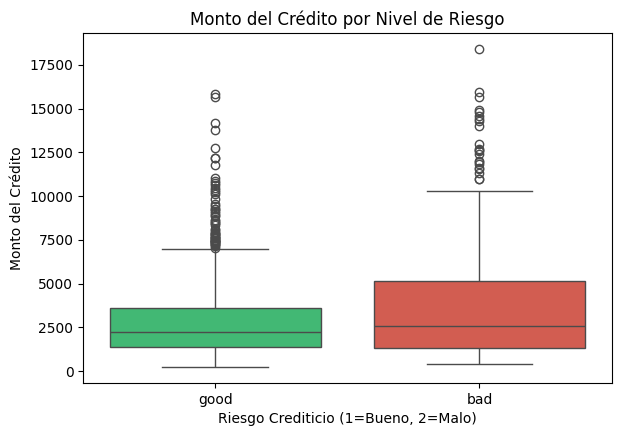

In [50]:
plt.figure(figsize=(15, 10))

# 5. Distribución del Monto del Crédito
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='target', y='credit_amount', palette=['#2ecc71', '#e74c3c'])
plt.title('Monto del Crédito por Nivel de Riesgo')
plt.xlabel('Riesgo Crediticio (1=Bueno, 2=Malo)')
plt.ylabel('Monto del Crédito')

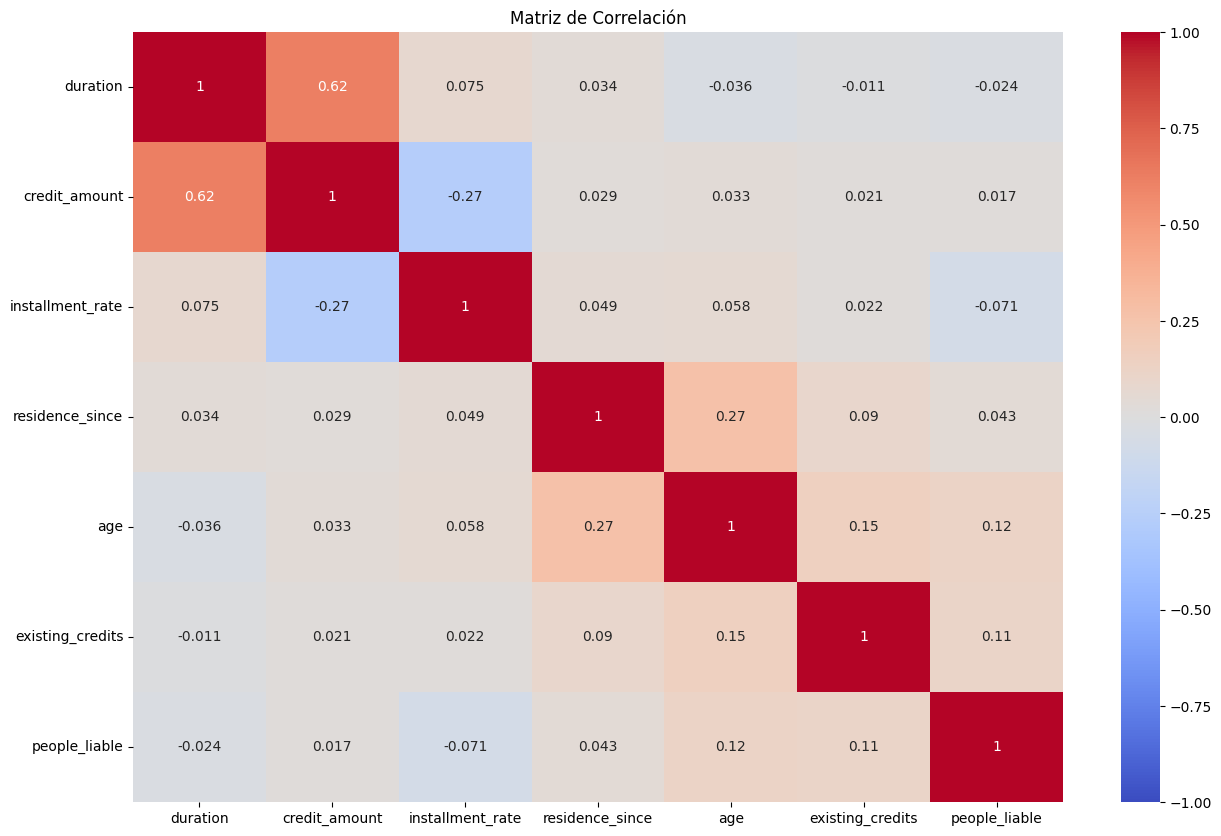

In [51]:

# Matriz de correlación
numerical_cols = X.select_dtypes(include=['number']).columns
correlation_matrix = X[numerical_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


## Sesgos Potenciales

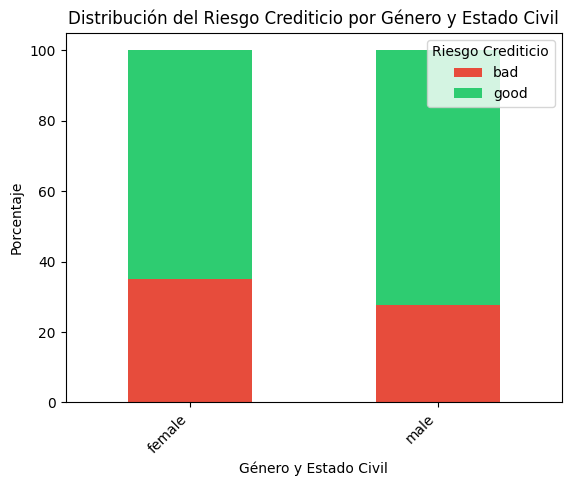

In [52]:
# 1. Análisis de Sesgo por Género
gender_target = pd.crosstab(df['personal_status'], df['target'], normalize='index') * 100
gender_target.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución del Riesgo Crediticio por Género y Estado Civil')
plt.xlabel('Género y Estado Civil')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Riesgo Crediticio')


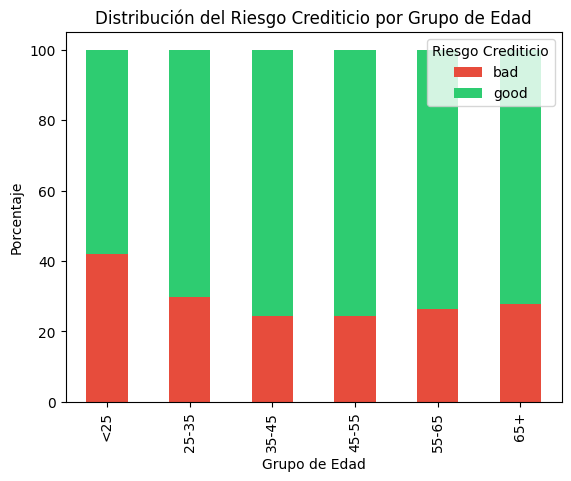

In [53]:
# 2. Análisis de Sesgo por Edad
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
age_target = pd.crosstab(df['age_group'], df['target'], normalize='index') * 100
age_target.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución del Riesgo Crediticio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Riesgo Crediticio')

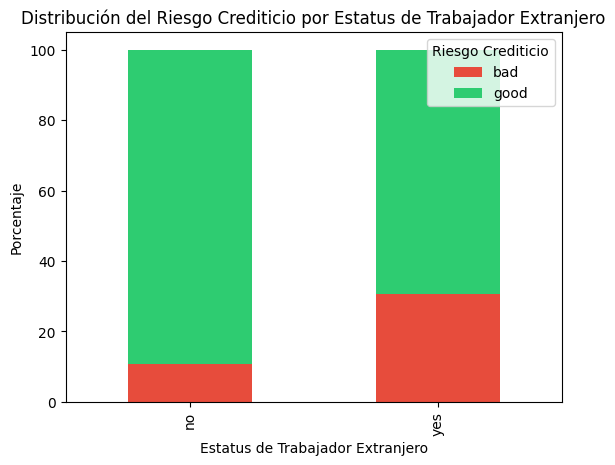

In [54]:
# 3. Sesgo por Trabajador Extranjero
foreign_target = pd.crosstab(df['foreign_worker'], df['target'], normalize='index') * 100
foreign_target.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución del Riesgo Crediticio por Estatus de Trabajador Extranjero')
plt.xlabel('Estatus de Trabajador Extranjero')
plt.ylabel('Porcentaje')
plt.legend(title='Riesgo Crediticio')

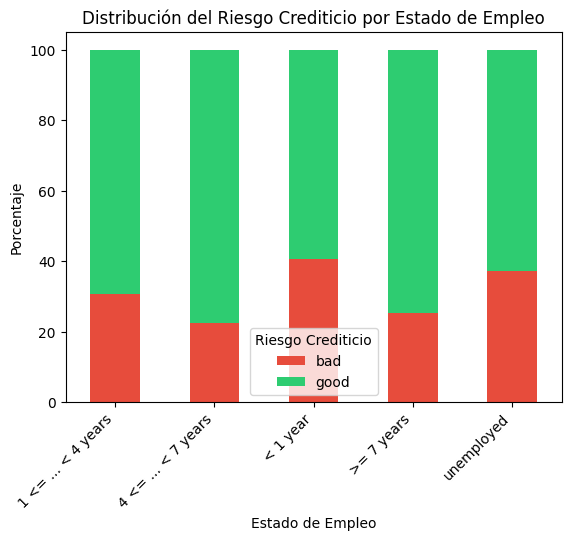

In [55]:
# 4. Sesgo por Estado de Empleo
employment_target = pd.crosstab(df['employment'], df['target'], normalize='index') * 100
employment_target.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución del Riesgo Crediticio por Estado de Empleo')
plt.xlabel('Estado de Empleo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Riesgo Crediticio')

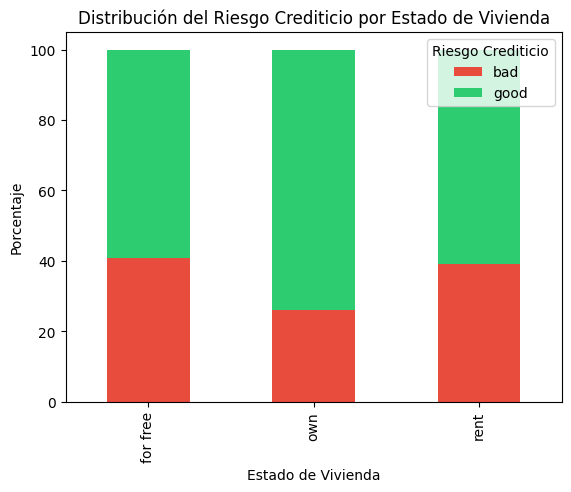

In [56]:
# 5. Sesgo por Estado de Vivienda
housing_target = pd.crosstab(df['housing'], df['target'], normalize='index') * 100
housing_target.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución del Riesgo Crediticio por Estado de Vivienda')
plt.xlabel('Estado de Vivienda')
plt.ylabel('Porcentaje')
plt.legend(title='Riesgo Crediticio')

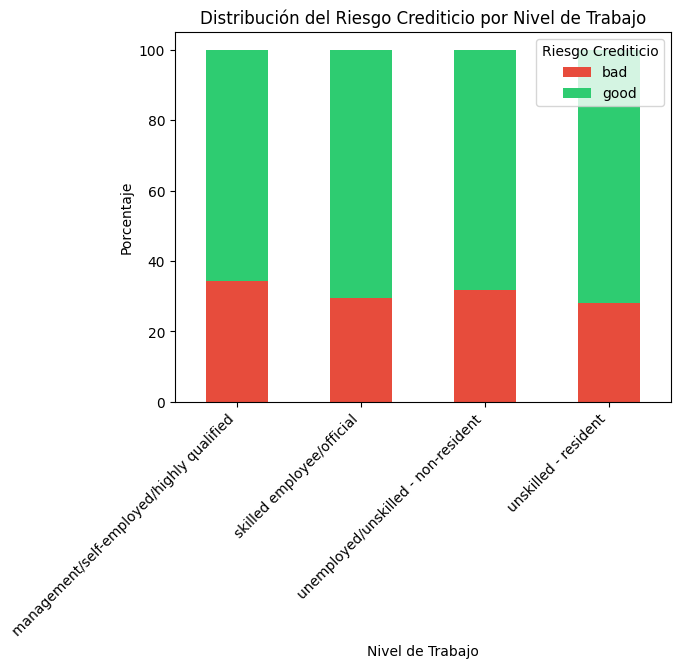

In [57]:
# 6. Sesgo por Nivel de Trabajo
job_target = pd.crosstab(df['job'], df['target'], normalize='index') * 100
job_target.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución del Riesgo Crediticio por Nivel de Trabajo')
plt.xlabel('Nivel de Trabajo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Riesgo Crediticio')

# Modelo Inicial

In [58]:
# Crear grupo A y B
df['group_a'] = df['personal_status'] == 'male'
df['group_b'] = df['personal_status'] == 'female'

In [59]:
X = df.drop(['target', 'age_group', 'group_a', 'group_b'], axis=1)
y = df['target'].map({'good': 1, 'bad': 0})

In [60]:
# Listar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols)
X = X_encoded

In [61]:
X['group_a'] = df['group_a']
X['group_b'] = df['group_b']

In [62]:
# Crear y entrenar modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [63]:
results = {}

In [64]:
X_train_grouped, X_test_grouped, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train_grouped.drop(['group_a', 'group_b'], axis=1)
X_test = X_test_grouped.drop(['group_a', 'group_b'], axis=1)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 59)
Test shape: (200, 59)


In [65]:
# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\nEntrenando {name}...")
    
    # Crear pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Entrenar pipeline
    pipeline.fit(X_train, y_train)
    
    # Predecir
    y_pred = pipeline.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'pipeline': pipeline
    }

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))



Entrenando Random Forest...
Accuracy: 0.820
Precision: 0.826
Recall: 0.943
F1 Score: 0.881

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.53      0.63        59
           1       0.83      0.94      0.88       141

    accuracy                           0.82       200
   macro avg       0.81      0.73      0.76       200
weighted avg       0.82      0.82      0.81       200


Entrenando Logistic Regression...
Accuracy: 0.805
Precision: 0.845
Recall: 0.887
F1 Score: 0.865

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        59
           1       0.84      0.89      0.87       141

    accuracy                           0.81       200
   macro avg       0.77      0.75      0.76       200
weighted avg       0.80      0.81      0.80       200



In [66]:
print("Comparación de modelos:")
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1 Score': [results[model]['f1'] for model in results]
})
print(comparison_df)

Comparación de modelos:
                Modelo  Accuracy  Precision    Recall  F1 Score
0        Random Forest     0.820   0.826087  0.943262  0.880795
1  Logistic Regression     0.805   0.844595  0.886525  0.865052


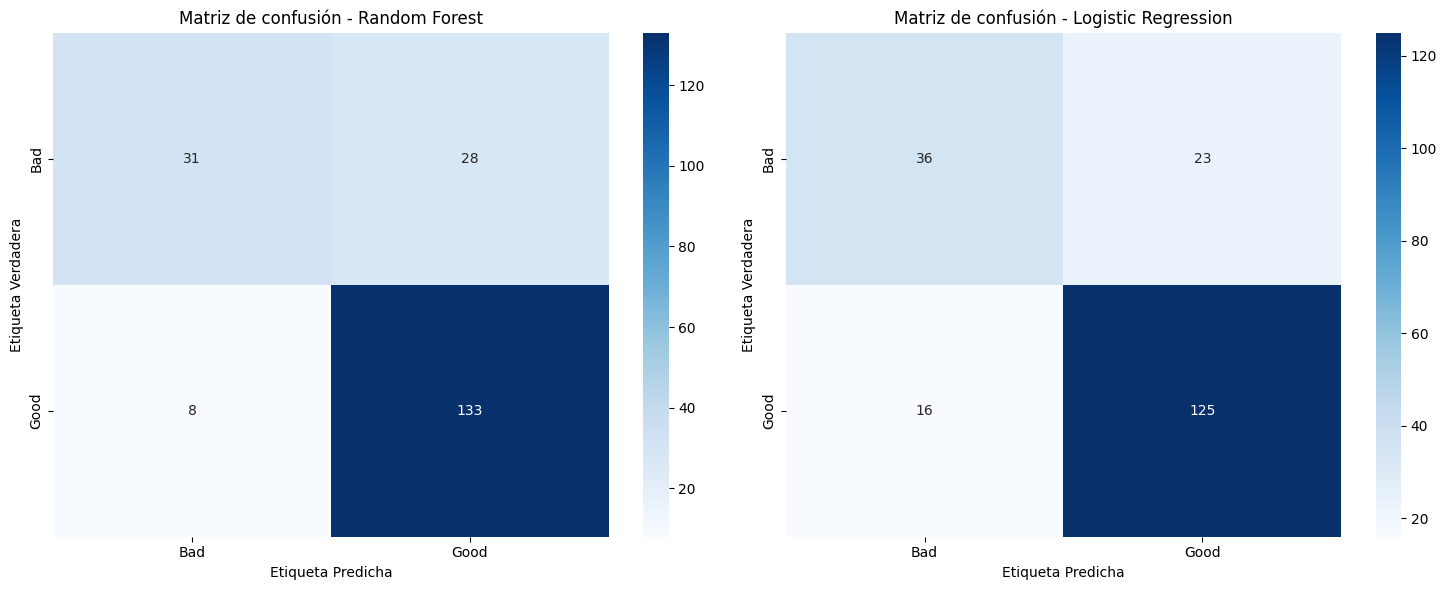

In [67]:
# Matrices de confusión
plt.figure(figsize=(15, 6))

for idx, (name, model_results) in enumerate(results.items(), 1):
    plt.subplot(1, 2, idx)
    cm = confusion_matrix(y_test, model_results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bad', 'Good'],
                yticklabels=['Bad', 'Good'])
    plt.title(f'Matriz de confusión - {name}')
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

plt.tight_layout()
plt.show()

# Evaluación de Equidad (género)

In [68]:
# Definir funciones para calcular métricas de fairness
def statistical_parity_difference(y_pred, protected_attribute):
    group_0_pred = y_pred[protected_attribute == 0].mean()
    group_1_pred = y_pred[protected_attribute == 1].mean()
    return abs(group_1_pred - group_0_pred)

def equalized_odds_difference(y_true, y_pred, protected_attribute):
    # True Positive Rate difference
    tpr_0 = np.mean((y_pred == 1) & (y_true == 1) & (protected_attribute == 0)) / np.mean((y_true == 1) & (protected_attribute == 0))
    tpr_1 = np.mean((y_pred == 1) & (y_true == 1) & (protected_attribute == 1)) / np.mean((y_true == 1) & (protected_attribute == 1))
    
    # False Positive Rate difference
    fpr_0 = np.mean((y_pred == 1) & (y_true == 0) & (protected_attribute == 0)) / np.mean((y_true == 0) & (protected_attribute == 0))
    fpr_1 = np.mean((y_pred == 1) & (y_true == 0) & (protected_attribute == 1)) / np.mean((y_true == 0) & (protected_attribute == 1))
    
    return max(abs(tpr_1 - tpr_0), abs(fpr_1 - fpr_0))

def equal_opportunity_difference(y_true, y_pred, protected_attribute):
    tpr_0 = np.mean((y_pred == 1) & (y_true == 1) & (protected_attribute == 0)) / np.mean((y_true == 1) & (protected_attribute == 0))
    tpr_1 = np.mean((y_pred == 1) & (y_true == 1) & (protected_attribute == 1)) / np.mean((y_true == 1) & (protected_attribute == 1))
    return abs(tpr_1 - tpr_0)

def predictive_parity_difference(y_true, y_pred, protected_attribute):
    ppv_0 = np.mean((y_true == 1) & (protected_attribute == 0) & (y_pred == 1)) / np.mean((y_pred == 1) & (protected_attribute == 0))
    ppv_1 = np.mean((y_true == 1) & (protected_attribute == 1) & (y_pred == 1)) / np.mean((y_pred == 1) & (protected_attribute == 1))
    return abs(ppv_1 - ppv_0)

# Crear variable protegida (género)
# Asumiendo que 'personal_status' contiene información de género
gender = (X_test['personal_status_male'] == 1).astype(int)  # 1 para mujeres, 0 para hombres

# Calcular métricas de fairness para el modelo inicial
threshold = 0.005
y_pred_initial = results['Random Forest']['y_pred']

# Calcular todas las métricas
sp_diff = statistical_parity_difference(y_pred_initial, gender)
eo_diff = equalized_odds_difference(y_test, y_pred_initial, gender)
eop_diff = equal_opportunity_difference(y_test, y_pred_initial, gender)
pp_diff = predictive_parity_difference(y_test, y_pred_initial, gender)

# Imprimir resultados
print("Análisis de Fairness (umbral = 0.005):")
print(f"\nStatistical Parity Difference: {sp_diff:.4f}")
print(f"¿Es fair según Statistical Parity? {'Sí' if sp_diff <= threshold else 'No'}")

print(f"\nEqualized Odds Difference: {eo_diff:.4f}")
print(f"¿Es fair según Equalized Odds? {'Sí' if eo_diff <= threshold else 'No'}")

print(f"\nEqual Opportunity Difference: {eop_diff:.4f}")
print(f"¿Es fair según Equal Opportunity? {'Sí' if eop_diff <= threshold else 'No'}")

print(f"\nPredictive Parity Difference: {pp_diff:.4f}")
print(f"¿Es fair según Predictive Parity? {'Sí' if pp_diff <= threshold else 'No'}")


Análisis de Fairness (umbral = 0.005):

Statistical Parity Difference: 0.0020
¿Es fair según Statistical Parity? Sí

Equalized Odds Difference: 0.0075
¿Es fair según Equalized Odds? No

Equal Opportunity Difference: 0.0075
¿Es fair según Equal Opportunity? No

Predictive Parity Difference: 0.0054
¿Es fair según Predictive Parity? No


# Mitigación de Sesgos

In [69]:
from holisticai.bias.metrics import classification_bias_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from holisticai.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from holisticai.bias.mitigation import PrejudiceRemover
from holisticai.bias.mitigation import Reweighing, CorrelationRemover

In [70]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# Test grupo A y B
test = pd.DataFrame({
    'group_a': X_test_grouped['group_a'],
    'group_b': X_test_grouped['group_b']
}, index=X_test_grouped.index)

baseline = classification_bias_metrics(test['group_a'], test['group_b'], y_pred, y_test, metric_type='both')
baseline_accuracy = accuracy_score(y_test, y_pred)

In [71]:
baseline

,Value,Reference
Metric,,
Statistical Parity,0.001984,0
Disparate Impact,1.002469,1
Four Fifths Rule,0.997537,1
Cohen D,0.005008,0
2SD Rule,0.031799,0
Equality of Opportunity Difference,-0.007541,0
False Positive Rate Difference,0.005602,0
Average Odds Difference,-0.000970,0
Accuracy Difference,-0.001984,0


In [72]:
baseline_accuracy

0.82

## Preprocesamiento

### Rewieghting

In [73]:
mitigator = Reweighing()
model = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("bm_preprocessing", mitigator), ("estimator", model),])
pipeline.fit(X_train, y_train, bm__group_a=X_train_grouped['group_a'], bm__group_b=X_train_grouped['group_b'])

y_pred_pipeline = pipeline.predict(X_test, bm__group_a=X_test_grouped['group_a'], bm__group_b=X_test_grouped['group_b'])

metrics_preprocessing_reweighting = classification_bias_metrics(X_test_grouped['group_a'], X_test_grouped['group_b'], y_pred_pipeline, y_test, metric_type='both')
accuracy_preprocessing_reweighting = accuracy_score(y_test, y_pred_pipeline)

In [74]:
metrics_preprocessing_reweighting

,Value,Reference
Metric,,
Statistical Parity,0.001984,0
Disparate Impact,1.002469,1
Four Fifths Rule,0.997537,1
Cohen D,0.005008,0
2SD Rule,0.031799,0
Equality of Opportunity Difference,-0.036953,0
False Positive Rate Difference,0.077031,0
Average Odds Difference,0.020039,0
Accuracy Difference,-0.043651,0


In [75]:
accuracy_preprocessing_reweighting

0.79

### Correlation Remover

In [76]:
mitigator = CorrelationRemover()
model = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('scalar', StandardScaler()), ("bm_preprocessing", mitigator), ("estimator", model),])
pipeline.fit(X_train, y_train, bm__group_a=X_train_grouped['group_a'], bm__group_b=X_train_grouped['group_b'])

y_pred_pipeline = pipeline.predict(X_test, bm__group_a=X_test_grouped['group_a'], bm__group_b=X_test_grouped['group_b'])

metrics_preprocessing_correlation_remover = classification_bias_metrics(X_test_grouped['group_a'], X_test_grouped['group_b'], y_pred_pipeline, y_test, metric_type='both')
accuracy_preprocessing_correlation_remover = accuracy_score(y_test, y_pred_pipeline)

In [77]:
metrics_preprocessing_correlation_remover

,Value,Reference
Metric,,
Statistical Parity,-0.013889,0
Disparate Impact,0.984127,1
Four Fifths Rule,0.984127,1
Cohen D,-0.040646,0
2SD Rule,-0.258079,0
Equality of Opportunity Difference,0.012066,0
False Positive Rate Difference,-0.086835,0
Average Odds Difference,-0.037384,0
Accuracy Difference,0.041667,0


In [78]:
accuracy_preprocessing_correlation_remover

0.78

### Performace

In [79]:
keys = ['Baseline', 'Preprocessing Mitigator Reweighting', 'Preprocessing Mitigator Correlation Remover']
comparison = pd.concat([baseline['Value'], metrics_preprocessing_reweighting['Value'],metrics_preprocessing_correlation_remover['Value']], axis=1)
comparison.columns = keys

comparison['Reference'] = 0
comparison.loc[['Disparate Impact', 'Four Fifths Rule'], 'Reference'] = 1

def highlight_closest(s):
    reference = s['Reference']
    differences = s.drop('Reference').apply(lambda x: abs(x - reference))
    closest = differences.idxmin()
    return ['background-color: mediumseagreen' if x == s[closest] else '' for x in s]

comparison_highlighted = comparison.style.apply(highlight_closest, axis=1)

In [80]:
comparison_highlighted

,Baseline,Preprocessing Mitigator Reweighting,Preprocessing Mitigator Correlation Remover,Reference
Metric,,,,
Statistical Parity,0.001984,0.001984,-0.013889,0
Disparate Impact,1.002469,1.002469,0.984127,1
Four Fifths Rule,0.997537,0.997537,0.984127,1
Cohen D,0.005008,0.005008,-0.040646,0
2SD Rule,0.031799,0.031799,-0.258079,0
Equality of Opportunity Difference,-0.007541,-0.036953,0.012066,0
False Positive Rate Difference,0.005602,0.077031,-0.086835,0
Average Odds Difference,-0.000970,0.020039,-0.037384,0
Accuracy Difference,-0.001984,-0.043651,0.041667,0
